In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import folium
from geopy.geocoders import Nominatim

In [2]:
bridge_data = Path("Cleaned_Bridge_df_Ver1.csv")

In [3]:
bridge_df = pd.read_csv(bridge_data)
bridge_df

,Latitude,Longitude,Year Built,Maintenance Responsibility,Bridge Condition,SqFt,Repair Cost Est,Replacement Cost Est
0,40.103450,-74.961092,1990,City or Municipal Highway Agency,G,237.90,74700.60,9.860479e+04
1,40.017092,-75.211428,1928,City or Municipal Highway Agency,F,631.68,198347.52,2.618187e+05
2,39.963467,-75.186778,1964,City or Municipal Highway Agency,P,2688.70,844251.80,1.114412e+06
3,39.963861,-75.185025,1964,City or Municipal Highway Agency,P,439.02,137852.28,1.819650e+05
4,40.035356,-75.208878,1957,City or Municipal Highway Agency,F,2384.64,748776.96,9.883856e+05
...,...,...,...,...,...,...,...,...
153,39.958900,-75.170372,2017,City or Municipal Highway Agency,G,592.02,185894.28,2.453804e+05
154,39.959400,-75.173906,2018,City or Municipal Highway Agency,G,795.60,249818.40,3.297603e+05
155,39.959500,-75.175500,2018,City or Municipal Highway Agency,G,838.95,263430.30,3.477280e+05
156,39.960194,-75.159694,1892,City or Municipal Highway Agency,P,82.08,25773.12,3.402052e+04


In [4]:
bridge_df.dtypes

Latitude                      float64
Longitude                     float64
Year Built                      int64
Maintenance Responsibility     object
Bridge Condition               object
SqFt                          float64
Repair Cost Est               float64
Replacement Cost Est          float64
dtype: object

In [5]:
total_repair_cost_est = bridge_df["Repair Cost Est"].sum()
total_replacement_cost_est = bridge_df["Replacement Cost Est"].sum()
difference = total_replacement_cost_est - total_repair_cost_est
def format_currency(amount):
    return '${:,.2f}'.format(amount)
total_repair_cost_est_formatted = format_currency(total_repair_cost_est)
total_replacement_cost_est_formatted = format_currency(total_replacement_cost_est)
difference_formatted = format_currency(difference)
print('Total Repair Cost Est:', total_repair_cost_est_formatted)
print('Total Replacement Cost Est:', total_replacement_cost_est_formatted)
print('Total Savings By Repairing Versus Replacing:', difference_formatted)

Total Repair Cost Est: $39,524,517.64
Total Replacement Cost Est: $52,172,363.29
Total Savings By Repairing Versus Replacing: $12,647,845.65


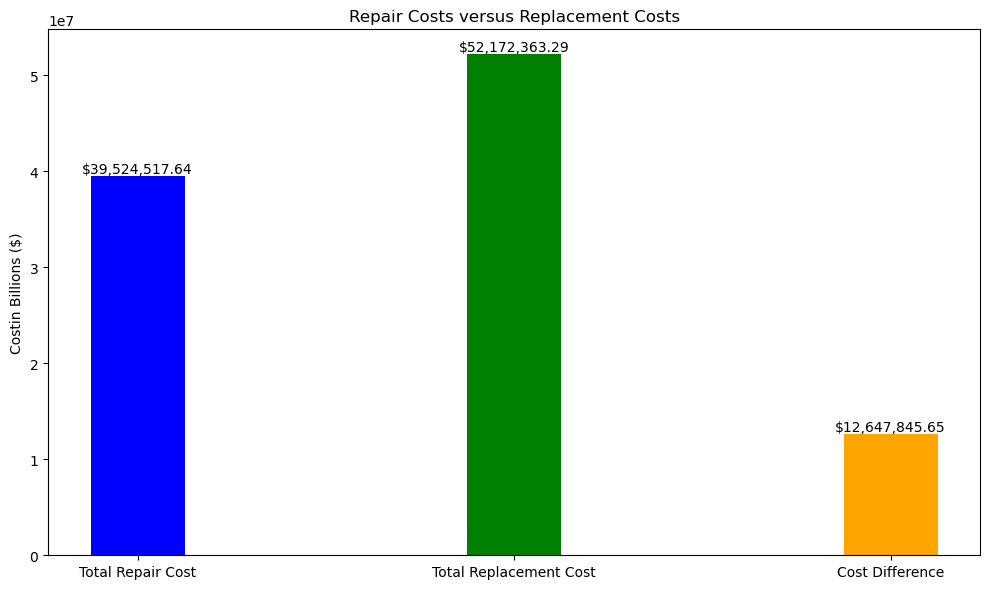

In [6]:
labels = ['Total Repair Cost', 'Total Replacement Cost', 'Cost Difference']
values = [total_repair_cost_est, total_replacement_cost_est, difference]

x_pos = np.arange(len(labels))

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['blue', 'green', 'orange'], width=0.25)
plt.title('Repair Costs versus Replacement Costs')
plt.ylabel('Costin Billions ($)')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), format_currency(value),
             ha='center', va='bottom', color='black', fontsize=10)
plt.xticks(x_pos, labels, rotation=0)
plt.tight_layout()
plt.show()

In [7]:
def format_currency(amount):
    return '${:,.2f}'.format(amount)
bridge_df['Repair Cost Est'] = bridge_df['Repair Cost Est'].apply(format_currency)
bridge_df['Replacement Cost Est'] = bridge_df['Replacement Cost Est'].apply(format_currency)
bridge_df

,Latitude,Longitude,Year Built,Maintenance Responsibility,Bridge Condition,SqFt,Repair Cost Est,Replacement Cost Est
0,40.103450,-74.961092,1990,City or Municipal Highway Agency,G,237.90,"$74,700.60","$98,604.79"
1,40.017092,-75.211428,1928,City or Municipal Highway Agency,F,631.68,"$198,347.52","$261,818.73"
2,39.963467,-75.186778,1964,City or Municipal Highway Agency,P,2688.70,"$844,251.80","$1,114,412.38"
3,39.963861,-75.185025,1964,City or Municipal Highway Agency,P,439.02,"$137,852.28","$181,965.01"
4,40.035356,-75.208878,1957,City or Municipal Highway Agency,F,2384.64,"$748,776.96","$988,385.59"
...,...,...,...,...,...,...,...,...
153,39.958900,-75.170372,2017,City or Municipal Highway Agency,G,592.02,"$185,894.28","$245,380.45"
154,39.959400,-75.173906,2018,City or Municipal Highway Agency,G,795.60,"$249,818.40","$329,760.29"
155,39.959500,-75.175500,2018,City or Municipal Highway Agency,G,838.95,"$263,430.30","$347,728.00"
156,39.960194,-75.159694,1892,City or Municipal Highway Agency,P,82.08,"$25,773.12","$34,020.52"


In [8]:
geolocator = Nominatim(user_agent="bridge_address")

In [9]:
def reverse_geocode(row):
    location = geolocator.reverse((row["Latitude"], row['Longitude']), exactly_one=True)
    if location:
        return location.address
    else:
        return "N/A"
    
#Add in Address column with reverse geocode data
bridge_df["Address"] = bridge_df.apply(reverse_geocode, axis=1)

bridge_df

,Latitude,Longitude,Year Built,Maintenance Responsibility,Bridge Condition,SqFt,Repair Cost Est,Replacement Cost Est,Address
0,40.103450,-74.961092,1990,City or Municipal Highway Agency,G,237.90,"$74,700.60","$98,604.79","Dunksferry Road, Mechanicsville, Bensalem Town..."
1,40.017092,-75.211428,1928,City or Municipal Highway Agency,F,631.68,"$198,347.52","$261,818.73","Ridge Avenue, Wissahickon, Philadelphia, Phila..."
2,39.963467,-75.186778,1964,City or Municipal Highway Agency,P,2688.70,"$844,251.80","$1,114,412.38","Spring Garden Street, Mantua, Philadelphia, Ph..."
3,39.963861,-75.185025,1964,City or Municipal Highway Agency,P,439.02,"$137,852.28","$181,965.01","2917, Spring Garden Street, Mantua, Philadelph..."
4,40.035356,-75.208878,1957,City or Municipal Highway Agency,F,2384.64,"$748,776.96","$988,385.59","Henry Avenue, Philadelphia, Philadelphia Count..."
...,...,...,...,...,...,...,...,...,...
153,39.958900,-75.170372,2017,City or Municipal Highway Agency,G,592.02,"$185,894.28","$245,380.45","North 19th Street, Center City, Philadelphia, ..."
154,39.959400,-75.173906,2018,City or Municipal Highway Agency,G,795.60,"$249,818.40","$329,760.29","Vine Street Expressway, Center City, Philadelp..."
155,39.959500,-75.175500,2018,City or Municipal Highway Agency,G,838.95,"$263,430.30","$347,728.00","North 22nd Street, Center City, Philadelphia, ..."
156,39.960194,-75.159694,1892,City or Municipal Highway Agency,P,82.08,"$25,773.12","$34,020.52","Noble Street, Chinatown, Center City, Philadel..."


In [10]:
good_bridges_df = bridge_df[bridge_df['Bridge Condition'] == 'G']
good_bridges_df
m = folium.Map([40.10345, -74.961092], zoom_start=11)



# Iterate over the "Good" bridges DataFrame and add markers to the map
for index, row in good_bridges_df.iterrows():
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"Bridge {row['Address']}", 
    icon=folium.Icon(color="green"),
    ).add_to(m)
m

# Show the map in a browser
#m.save("good_bridges_map.html")

In [11]:
fair_bridges_df = bridge_df[bridge_df['Bridge Condition'] == 'F']
fair_bridges_df
m = folium.Map([40.10345, -74.961092], zoom_start=11)



# Iterate over the "Good" bridges DataFrame and add markers to the map
for index, row in fair_bridges_df.iterrows():
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"Bridge {row['Address']}", 
    icon=folium.Icon(color="orange"),
    ).add_to(m)
m

# Show the map in a browser
#m.save("good_bridges_map.html")

In [12]:
poor_bridges_df = bridge_df[bridge_df['Bridge Condition'] == 'P']
poor_bridges_df
m = folium.Map([40.10345, -74.961092], zoom_start=11)



# Iterate over the "Good" bridges DataFrame and add markers to the map
for index, row in fair_bridges_df.iterrows():
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"Bridge {row['Address']}", 
    icon=folium.Icon(color="red"),
    ).add_to(m)
m

# Show the map in a browser
#m.save("good_bridges_map.html")